In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
df = pd.read_csv('mumbai-house-price-data-cleaned.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71938 entries, 0 to 71937
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           71938 non-null  object 
 1   price           71938 non-null  int64  
 2   area            71938 non-null  int64  
 3   price_per_sqft  71938 non-null  float64
 4   locality        71938 non-null  object 
 5   city            71938 non-null  object 
 6   property_type   71938 non-null  object 
 7   bedroom_num     71938 non-null  int64  
 8   bathroom_num    71938 non-null  int64  
 9   balcony_num     71938 non-null  int64  
 10  furnished       71938 non-null  object 
 11  age             71938 non-null  int64  
 12  total_floors    71938 non-null  int64  
 13  latitude        71938 non-null  float64
 14  longitude       71938 non-null  float64
dtypes: float64(3), int64(7), object(5)
memory usage: 8.2+ MB


,price,area,price_per_sqft,bedroom_num,bathroom_num,balcony_num,age,total_floors,latitude,longitude
count,7.193800e+04,71938.000000,71938.000000,71938.000000,71938.000000,71938.000000,71938.000000,71938.000000,71938.000000,71938.000000
mean,1.951272e+07,943.251369,18489.401813,1.993884,2.082432,0.164336,2.247852,1.004740,19.171970,72.964390
std,3.320767e+07,645.881922,12691.857370,0.914573,0.854540,0.593804,4.230751,0.381272,0.465753,0.406728
min,3.200000e+04,123.000000,25.376685,0.000000,1.000000,0.000000,0.000000,1.000000,12.889899,72.435379
25%,6.524250e+06,595.000000,9230.769231,1.000000,2.000000,0.000000,0.000000,1.000000,19.071314,72.858833
50%,1.200000e+07,775.000000,16080.402010,2.000000,2.000000,0.000000,0.000000,1.000000,19.164281,72.916528
75%,2.150000e+07,1100.000000,23913.043478,3.000000,2.000000,0.000000,3.000000,1.000000,19.229946,73.021536
max,2.147484e+09,24109.000000,290000.000000,15.000000,15.000000,15.000000,57.000000,70.000000,72.868339,91.804413


In [11]:
# Drop unnecessary/redundant columns
df = df.drop(['title', 'price_per_sqft', 'city'], axis=1)


In [12]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['locality', 'property_type', 'furnished'], drop_first=True)


In [13]:
# Define Features (X) and Target (y)
y = df['price']
X = df.drop('price', axis=1)

In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R²: 0.6775662053896332
Linear Regression RMSE: 17783761.507916767


In [16]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R²: 0.8819715880752493
Random Forest RMSE: 10759612.486006018


In [17]:
# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

                   Feature  Importance
0                     area    0.516082
7                longitude    0.191737
1              bedroom_num    0.100430
6                 latitude    0.100043
199  locality_Malabar Hill    0.020991
4                      age    0.016036
2             bathroom_num    0.008654
3              balcony_num    0.007983
420  furnished_Unfurnished    0.003714
418    property_type_Villa    0.003035


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # ✅ Add this
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


ModuleNotFoundError: No module named 'tensorflow'

In [21]:
# STEP 3: Feature & target separation
y = df['price']
X = df.drop('price', axis=1)

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP 6: Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # output layer (price)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# STEP 7: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# STEP 8: Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

# STEP 9: Predict
predictions = model.predict(X_test[:5])
print("Predicted prices:", predictions.flatten())
print("Actual prices:", y_test[:5].values)

# STEP 10: Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'StandardScaler' is not defined

/tmp/ipykernel_13806/3827441947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')


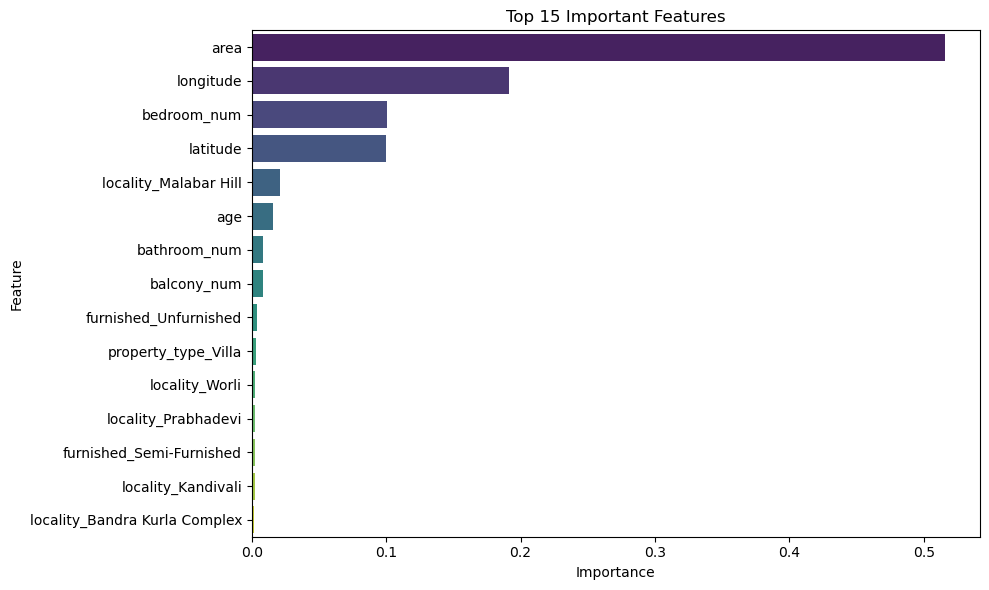

In [20]:
# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Important Features")
plt.tight_layout()
plt.show()